<img src="https://raw.githubusercontent.com/melipass/umayor-ui-proyectos/main/logo-escuela.png" width="400" align="left" style="margin-bottom:20px;margin-right:20px;margin-top:25px">
   
# Inteligencia Artificial
## Experiencia de Laboratorio 6: Perceptrón simple


## Objetivo del laboratorio
Comprobar el funcionamiento de los modelos de redes neuronales correspondientes al perceptrón simple.

## Conceptos
### Perceptrón
El perceptrón es la red neuronal más básica, de una sola capa y con una función de activación de escalón. El perceptrón se utiliza para la clasificación binaria de datos.

## Desarrollo
### 1. Implementar el perceptrón

>Implementar un perceptrón simple y genérico en Python con una función de activación. Ajustar los pesos en cada iteración según corresponda, y entregar una salida acorde a la entrada recibida.

Como primer paso, inicializamos el notebook con las librerías requeridas para trabajar. De ser necesario, hay que instalarlas.

In [1]:
#!pip install seaborn
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install graphviz

import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100
import pandas as pd
import itertools
from graphviz import Digraph
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Según lo visto en clases, la función de activación del perceptrón es la de escalón, y será la utilizada en este notebook. Esta está definida de la siguiente manera:

$$ \theta(z)=   \left\{
\begin{array}{ll}
      1 & z \geq 0 \\
      0 & z < 0 \\
\end{array} 
\right.  $$

En donde el valor de $z$ corresponde a el valor ingresado en la función de activación $\theta$, y la salida de la función solo tiene dos posibles valores: $0$ y $1$.

In [2]:
# Función de activación del perceptrón
def theta(z):
    return 1.0 if (z > 0) else 0.0

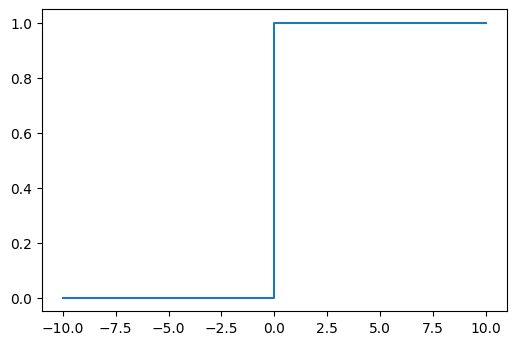

In [3]:
# Gráfico que representa la función de activación anterior
x = [-10,0,1,10] 
y = [0,0,1,1]
plt.step(x, y)
plt.show()

Usando esta función de activación, definiremos nuestro perceptrón como:

$$
y(\boldsymbol{x},\boldsymbol{w},b) = \theta(\boldsymbol{w}\cdot\boldsymbol{x}+b) = \theta(w_1x_1+w_2x_2+\dots+w_nx_n+b)
$$


Donde el vector $\boldsymbol{x}$ corresponde a las entradas del perceptrón y el vector $\boldsymbol{w}$ corresponde al peso asignado a cada uno. Esto se suma para después aplicar la función de activación, y queda nuestro perceptrón de la siguiente manera:

In [4]:
def perceptron(x,w,b):
    entrada_theta = np.dot(w,x)+b
    return theta(entrada_theta)

El código de arriba contiene una función de producto punto que suma la multiplicación de cada elemento de los vectores, agregando el valor $b$ al final y almacenando el resultado en la variable ```entrada_theta```:

$$\text{entrada_theta} = \left(\Sigma w_ix_i\right)+b$$

Ese resultado se ingresa en la función de activación que definimos como $\theta$, la que luego nos devolverá el resultado del perceptrón. Visualmente, esto fluye así:

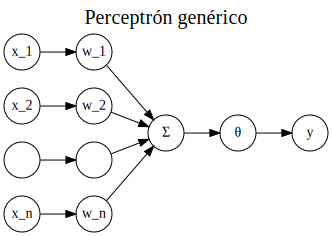

In [5]:
nodos = ['x_1','x_2','⋮','x_n','w_1','w_2','⋮ ', 'w_n','Σ','θ','y']
vertices = {('x_1','w_1'),
           ('x_2','w_2'),
           ('⋮','⋮ '),
           ('x_n','w_n'),
           ('w_1','Σ'),
           ('w_2','Σ'),
           ('⋮ ','Σ'),
           ('w_n','Σ'),
           ('Σ','θ'),
           ('θ','y')}


dot = Digraph(node_attr={'shape':'circle','fixedsize':'true'},
             graph_attr={'rankdir':'LR','label':'Perceptrón genérico','labelloc':'t','fontsize':'20'})

for nodo in nodos:
    dot.node(nodo)
    
for vertice in vertices:
    dot.edge(vertice[0],vertice[1])
    
dot

### 2. Probar el perceptrón en AND, OR y XOR
>Probar el perceptrón implementado para una compuerta lógica $\text{AND}$, $\text{OR}$ y $\text{XOR}$ con una entrada de tamaño 4.

Para implementar perceptrones que simulen las compuertas lógicas $\text{AND}$, $\text{OR}$ y $\text{XOR}$ y que tengan cuatro entradas $x_1$, $x_2$, $x_3$ y $x_4$, debemos tomar el perceptrón y ajustarlo para que quede de la siguiente manera:
$$
y(\boldsymbol{x},\boldsymbol{w},b)=\theta(w_1x_1+w_2x_2+w_3x_3+w_4x_4+b)
$$

También, sabemos que existe un total de 16 posibles combinaciones de entradas para las compuertras con cuatro entradas, así que las dejaremos codificadas en un arreglo para probar en la parte 4:

In [6]:
l = [0,1]
x = [list(i) for i in itertools.product(l, repeat=4)]
print(x)

[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]


#### 2.1. Compuerta AND

La compuerta lógica $\text{AND}$ entrega el valor $1$ solo cuando todas sus entradas son $1$. Para que el perceptrón nos entregue el valor $1$ solo cuando todos los valores son $1$, debemos asignar valores a cada peso $w$ y al valor $b$, quedando así:

$$
\text{AND}(\text{x})=\theta(x_1+x_2+x_3+x_4-3.9)
$$

Donde decidimos dejar cada uno de los pesos $w_i = 1$ y el valor $b=-3.9$ para que la salida del perceptrón sea mayor a $0$ solo cuando todas las entradas valen $1$, teniendo que $1\cdot4-3.9=0.1$, y que $0.1>0 \Rightarrow y=1$.

In [7]:
def compuerta_AND(x):
    w = [1,1,1,1]
    b = -3.9
    return perceptron(x,w,b)

#### 2.2. Compuerta OR
La compuerta lógica $\text{OR}$ también obtiene cuatro valores binarios y devuelve $1$ cuando existe al menos una entrada con valor $1$. El perceptrón queda así:

$$
\text{OR}(\text{x})=\theta(x_1+x_2+x_3+x_4-0.9)
$$

Donde decidimos dejar cada uno de los pesos $w_i = 1$ y el valor $b=-0.9$. Así, el perceptrón devolverá $1$ cuando exista al menos una entrada con valor $1$, ya que $1-0.9=0.1$ y sabemos que $0.1>0\Rightarrow y=1$.

In [8]:
def compuerta_OR(x):
    w = [1,1,1,1]
    b = -0.9
    return perceptron(x,w,b)

#### 2.3. Compuerta XOR
En el caso de la compuerta $\text{XOR}$, sabemos que es necesario que nuestra compuerta devuelva el valor $0$ cuando todas las entradas son $0$ o $1$. Para ello, tuvimos que codificar la siguiente situación:

- Encontrar la función que nos de $0$ solo cuando $\text{AND}$ nos devuelve $1$ (en otras palabras, hacer la compuerta $\text{NAND}$).
- Poder combinar el resultado de la compuerta $\text{NAND}$ con el de la compuerta $\text{OR}$, es decir, crear un $\text{AND}$ con dos entradas.

Una vez que identificamos esos dos requisitos creamos una función para cada uno, y así pudimos crear la compuerta $\text{XOR}$ que funciona satisfactoriamente. De esta forma, nos quedó la función $\text{XOR}$ como:

$$
\text{XOR}(\text{x})=\text{AND}(\text{NAND}(\text{x}),\text{OR}(\text{x})) = \text{AND}(\text{NAND}(x_1,x_2,x_3,x_4),\text{OR}(x_1,x_2,x_3,x_4))
$$

In [9]:
def compuerta_AND_2_entradas(x):
    w = [1,1]
    b = -1.9
    return perceptron(x,w,b)

def compuerta_NAND(x):
    w = [-1,-1,-1,-1]
    b = 3.9
    return perceptron(x,w,b)

def compuerta_XOR(x):
    compuerta_1 = compuerta_NAND(x)
    compuerta_2 = compuerta_OR(x)
    return compuerta_AND_2_entradas([compuerta_1,compuerta_2])

Visualmente, las entradas pasan por las compuertas de la siguiente manera:

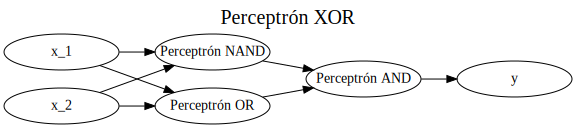

In [10]:
nodos = ['x_1','x_2','Perceptrón NAND','Perceptrón OR','Perceptrón AND','y']
vertices = {('x_1','Perceptrón NAND'),
           ('x_2','Perceptrón NAND'),
           ('x_1','Perceptrón OR'),
           ('x_2','Perceptrón OR'),
           ('Perceptrón NAND','Perceptrón AND'),
           ('Perceptrón OR','Perceptrón AND'),
           ('Perceptrón AND','y')}


dot = Digraph(node_attr={'fixedsize':'true','width':'1.6'},
             graph_attr={'rankdir':'LR','label':'Perceptrón XOR','labelloc':'t','fontsize':'20'})

for nodo in nodos:
    dot.node(nodo)
    
for vertice in vertices:
    dot.edge(vertice[0],vertice[1])
    
dot

### 3. Probar el perceptrón con un dataset
>Probar el perceptrón implementado para clasificar las entradas del dataset "letters.csv" determinando a qué letra corresponde cada entrada según las características recibidas.

Primero que nada, cargamos los datos para ver con qué estamos trabajando.

In [11]:
df = pd.read_csv('letters.csv', header=None)
df

,0,1,2
0,0.0,0.3,o
1,0.3,0.0,o
2,0.6,0.2,o
3,0.5,0.1,o
4,0.2,0.4,o
...,...,...,...
95,0.8,0.1,l
96,0.6,0.7,o
97,1.0,0.7,o
98,0.9,0.0,l


In [12]:
df[2].unique()

array(['o', 'l'], dtype=object)

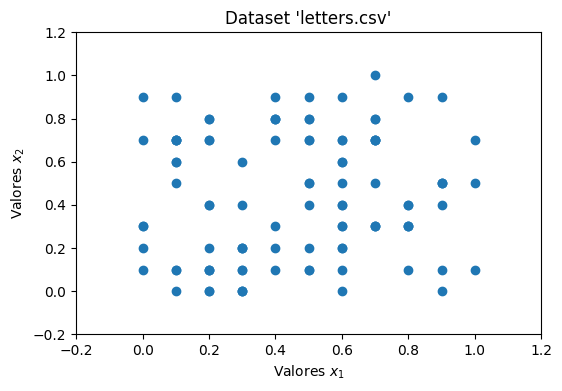

In [13]:
plt.scatter(df[0], df[1])#, color="orchid", marker="x", s=50)
plt.title("Dataset 'letters.csv'")
plt.xlabel('Valores $x_1$')
plt.ylabel('Valores $x_2$')
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.show()

Todos los valores numéricos de la tabla son positivos y no tenemos información de qué significa cada uno de ellos. Asumiremos que las dos primeras columnas de cada fila $i$ corresponderán a valores de entrada $x_1$ y $x_2$ y la tercera columna será la letra a clasificar, con valor ``o`` o ``l``.

A continuación pasamos los datos del dataframe a un array:

In [14]:
datos = np.copy(df)
datos = np.array(datos)

Creamos una función que nos devuelva un dataframe con la letra y  la salida del perceptrón. Al perceptrón le daremos las dos columnas numéricas como entradas, un peso $\text{w}$ y un valor $b$ como variables para optimizar la clasificación en la sección 4.

In [15]:
def perceptron_datos(x,w,b):
    df_datos = []
    for valor in x:
        df_datos.append([valor[2],perceptron([valor[0],valor[1]],w,b),valor[0],valor[1]])
    return df_datos

### 4. Cálculo de error
>Calcular el error obtenido en los pasos 2 y 3 durante el entrenamiento del perceptrón y expresarlo a través de un gráfico Iteración vs. Error.

#### 4.1. Perceptrones de compuertas lógicas
Para poder confirmar visualmente la existencia de un error dentro de nuestros perceptrones que implementan compuertas lógicas, decidimos hacer una función genérica para crear gráficos estilo 'serie de tiempo', donde podemos ver cómo va variando entre $0$ y $1$ el resultado de nuestros perceptrones a medida que vamos ingresando una lista de entradas. De esta manera, tendremos una guía visual de cuándo un perceptrón devuelve $0$ y cuándo devuelve $1$, y le entregaremos una función que marca el momento en el que se detecta un error para cada uno de los perceptrones.

In [16]:
def graficar_compuerta(x,compuerta,detector_error,titulo):
    h = [0]
    v = [0]
    i = 1
    error_en_titulo = ""
    for posible_valor in x:
        h.append(i)
        i += 1
        v.append(compuerta(posible_valor))
    plt.plot(h, v)
    plt.scatter(h, v, color="orchid", marker="x", s=50)
    plt.xticks(h)
    plt.yticks(v)
    if detector_error(x,compuerta) != 1:
        x_error = int(detector_error(x,compuerta))
        plt.axvline(x = x_error+1, color = 'red')
        error_en_titulo = " (Error)"
    plt.title(titulo+error_en_titulo)
    plt.show()
    df = pd.DataFrame({'Entrada': x, 'Salida': v[1:]})
    print(df)

##### 4.1.1. Prueba AND

Sabemos que para un conjunto de entradas $x_n$, donde ninguna combinación de entradas se repite, la suma de todas las posibles salidas de la compuerta $\text{AND}$ jamás superará el valor $1$, cualquiera sea su dimensión. Teniendo esto presente, creamos la siguiente función:

In [17]:
def error_compuerta_AND(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i > 1:
            print('Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

error_compuerta_AND(x,compuerta_AND)

No se detectaron errores.


1

Tomando los valores que asignamos en la sección 2, obtenemos el siguiente gráfico y la siguiente tabla, donde en el eje x tendremos el índice de la combinación de entradas y en el eje y si esta corresponde a 0 o a 1, lo que nos permitirá confirmar si hay o no hay errores.

No se detectaron errores.


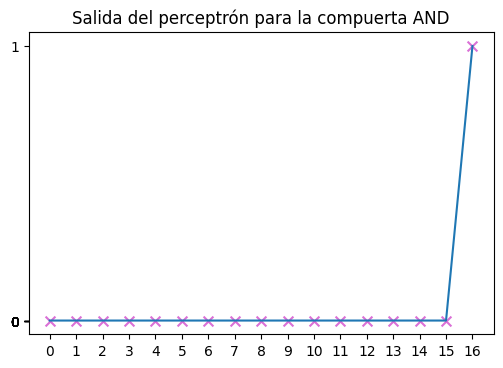

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     0.0
2   [0, 0, 1, 0]     0.0
3   [0, 0, 1, 1]     0.0
4   [0, 1, 0, 0]     0.0
5   [0, 1, 0, 1]     0.0
6   [0, 1, 1, 0]     0.0
7   [0, 1, 1, 1]     0.0
8   [1, 0, 0, 0]     0.0
9   [1, 0, 0, 1]     0.0
10  [1, 0, 1, 0]     0.0
11  [1, 0, 1, 1]     0.0
12  [1, 1, 0, 0]     0.0
13  [1, 1, 0, 1]     0.0
14  [1, 1, 1, 0]     0.0
15  [1, 1, 1, 1]     1.0


In [18]:
graficar_compuerta(x,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

Para poner a prueba nuestro perceptrón que implementa una compuerta, usaremos dos conjuntos: uno con valores que no deberían ser aceptados, y otro con valores repetidos. La línea roja representará la iteración desde la cual comienza a estar erróneo nuestro perceptrón bajo las reglas establecidas de no repetición y admisión exclusiva de entradas $0$ y $1$, teniendo que los valores a la derecha de la línea ya no son correctos pues harán que la suma de todas las salidas sea mayor a $1$.

In [19]:
x_2_3 = [[2,3,3,2],[2,2,2,2],[3,3,3,3]]
x_repetido = [[1,1,1,1],[0,1,1,1],[1,1,1,1],[1,1,0,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]

In [20]:
error_compuerta_AND(x_2_3,compuerta_AND)

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


2.0

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


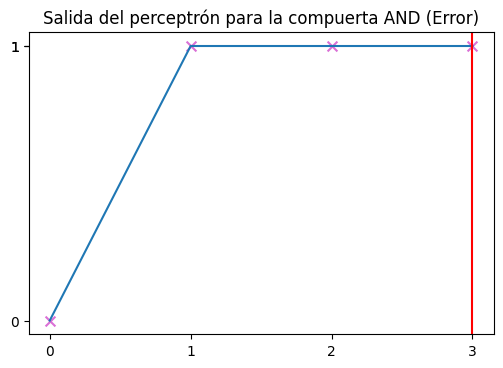

        Entrada  Salida
0  [2, 3, 3, 2]     1.0
1  [2, 2, 2, 2]     1.0
2  [3, 3, 3, 3]     1.0


In [21]:
graficar_compuerta(x_2_3,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

In [22]:
error_compuerta_AND(x_repetido,compuerta_AND)

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


2.0

Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta AND no es la correcta.


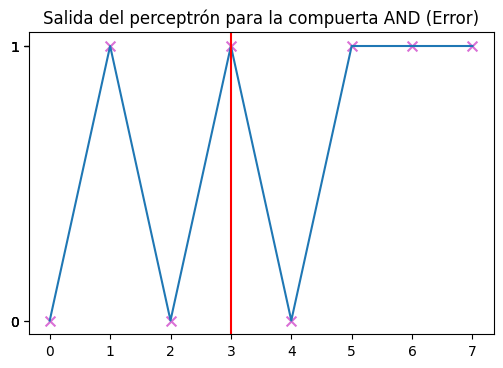

        Entrada  Salida
0  [1, 1, 1, 1]     1.0
1  [0, 1, 1, 1]     0.0
2  [1, 1, 1, 1]     1.0
3  [1, 1, 0, 1]     0.0
4  [1, 1, 1, 1]     1.0
5  [1, 1, 1, 1]     1.0
6  [1, 1, 1, 1]     1.0


In [23]:
graficar_compuerta(x_repetido,compuerta_AND,error_compuerta_AND,'Salida del perceptrón para la compuerta AND')

##### 4.1.2. Prueba OR
Para la prueba en el caso de la compuerta OR, sabemos que si existen $x^2$ posibles combinaciones de entradas (donde $x$ es la cantidad de entradas), siempre existirá una salida que jamás tendrá el valor $1$. Por lo tanto, haremos un chequeo para detectar un error cuando la suma de los resultados de $\text{OR}(x)$ sea igual o mayor que $x^2$, teniendo la misma regla del caso anterior en la que cada combinación solo puede existir una vez en nuestro arreglo.

En el caso específico del perceptrón donde implementamos la compuerta $\text{OR}$, sabemos que hay cuatro entradas, por lo tanto la cantidad de salidas será $4^2=4\times4=16$.

In [24]:
def error_compuerta_OR(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i >= (len(x[0])*len(x[0])):
            print('Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

No se detectaron errores.


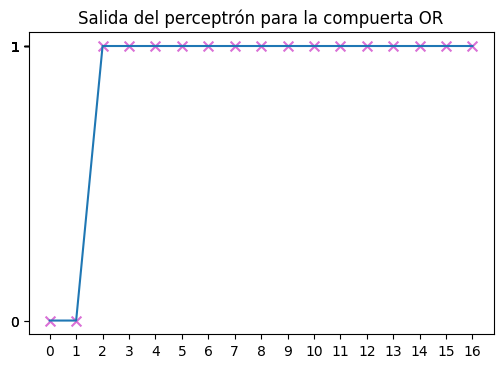

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     1.0


In [25]:
graficar_compuerta(x,compuerta_OR,error_compuerta_OR,'Salida del perceptrón para la compuerta OR')

En el ejemplo de arriba, la suma total da 15. Sin embargo, en el ejemplo de abajo, la suma total supera el valor de 15 y nuestro código insertará una línea roja desde el punto en el que el error aparece, considerando incorrecto el gráfico desde esa línea vertical hacia la derecha.

In [26]:
x_error_or = np.copy(x)
x_error_or = x_error_or.tolist()
x_error_or.append([1,2,1,1])
x_error_or.append([1,2,5,1])

Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta OR no es la correcta.


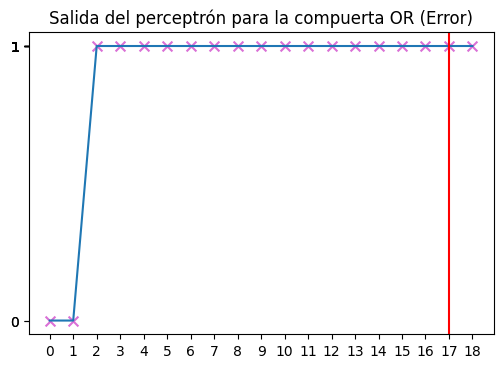

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     1.0
16  [1, 2, 1, 1]     1.0
17  [1, 2, 5, 1]     1.0


In [27]:
graficar_compuerta(x_error_or,compuerta_OR,error_compuerta_OR,'Salida del perceptrón para la compuerta OR')

##### 4.1.3. Prueba XOR
Bajo la misma lógica que la prueba anterior, sabemos que la suma de todas las salidas de $\text{XOR}$ siempre será $x^2-2$, donde $x$ corresponde a la cantidad de entradas. Teniendo esto presente, tomaremos el código para validar $\text{OR}$ y lo ajustaremos a $\text{XOR}$, mostrándonos un error cuando la suma de las salidas supera $x^2-2$.

In [28]:
def error_compuerta_XOR(x,compuerta):
    i = 0
    for posible_valor in x:
        i += compuerta(posible_valor)
        if i >= (len(x[0])*len(x[0])-1):
            print('Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.')
            return i
    print("No se detectaron errores.")
    return 1

No se detectaron errores.


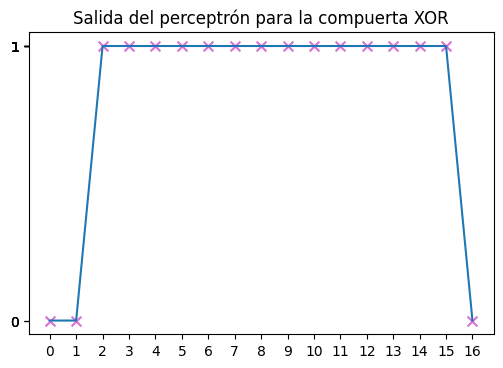

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 1, 1, 1]     0.0


In [29]:
graficar_compuerta(x,compuerta_XOR,error_compuerta_XOR,'Salida del perceptrón para la compuerta XOR')

Si repetimos algunas combinaciones, nos encontraremos con que la suma de todas las salidas superará $x^2-2$ y nos dará error:

In [30]:
x_error_xor = np.copy(x)
x_error_xor = x_error_xor.tolist()
x_error_xor.remove([1,1,1,1])
x_error_xor.append([1,0,1,1])
x_error_xor.append([1,0,0,1])
x_error_xor.append([1,0,1,0])
x_error_xor.append([1,1,1,1])

Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.
Error: Existen entradas incorrectas o la lógica de la compuerta XOR no es la correcta.


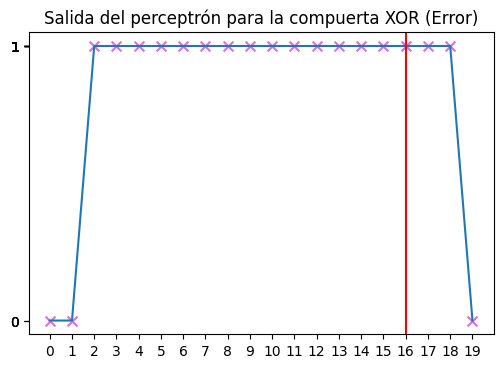

         Entrada  Salida
0   [0, 0, 0, 0]     0.0
1   [0, 0, 0, 1]     1.0
2   [0, 0, 1, 0]     1.0
3   [0, 0, 1, 1]     1.0
4   [0, 1, 0, 0]     1.0
5   [0, 1, 0, 1]     1.0
6   [0, 1, 1, 0]     1.0
7   [0, 1, 1, 1]     1.0
8   [1, 0, 0, 0]     1.0
9   [1, 0, 0, 1]     1.0
10  [1, 0, 1, 0]     1.0
11  [1, 0, 1, 1]     1.0
12  [1, 1, 0, 0]     1.0
13  [1, 1, 0, 1]     1.0
14  [1, 1, 1, 0]     1.0
15  [1, 0, 1, 1]     1.0
16  [1, 0, 0, 1]     1.0
17  [1, 0, 1, 0]     1.0
18  [1, 1, 1, 1]     0.0


In [31]:
graficar_compuerta(x_error_xor,compuerta_XOR,error_compuerta_XOR,'Salida del perceptrón para la compuerta XOR')

#### 4.2. Perceptrón con el dataset 'letters.csv'
Para trabajar con el perceptrón, usaremos la función definida en la sección 3 para poder armar un dataframe que contenga dos columnas: la letra clasificada, y la salida del perceptrón.

En esa función debemos ingresar el conjunto de datos a usar, los pesos $\text{w}$ y también un valor $b$. Para sistematizar la búsqueda de valores óptimos para los pesos y para el valor $b$, sabemos que idealmente tendremos una clasificación 100% correcta para la letra ``o`` y la letra ``l``, lo que llevado a números equivale a $1.0$ para cada una, por lo tanto, si sumamos esto, sabemos que el valor ideal de la suma de los valores óptimos de ``o`` y ``l`` será $2.0$, e iremos probando con números cercanos a esa cifra:

In [32]:
def evaluacion_perceptron_datos(suma_optima_a_buscar):
    for i in range(1,11):
        for j in range(1,11):
            for k in range(1,11):
                for l in [-1,1]:
                    df_salida = pd.DataFrame(perceptron_datos(datos,[1/i,1/j],l*1/k), columns=['Letra','Salida','x_1','x_2'])
                    o_en_cero = 0
                    o_en_uno = 0
                    l_en_cero = 0
                    l_en_uno = 0
                    for valor in df_salida.values:
                        if (valor[0] == 'o'):
                            if valor[1] == 0.0:
                                o_en_cero += 1
                            else:
                                o_en_uno += 1
                        else:
                            if valor[1] == 0.0:
                                l_en_cero += 1
                            else:
                                l_en_uno += 1
                    if o_en_cero/(o_en_cero+o_en_uno) + l_en_uno/(l_en_cero+l_en_uno) > suma_optima_a_buscar:
                        print("¡Valores encontrados!")
                        print("Peso w_1: " + str(1/i))
                        print("Peso w_2: " + str(1/j))
                        print("Valor b: " + str(l*1/k))

Buscamos primero si existen valores que nos entreguen la clasificación perfecta, es decir, sin errores:

In [33]:
evaluacion_perceptron_datos(2.0)

Y al no recibir valores de vuelta, bajamos la cifra a $1.8$:

In [34]:
evaluacion_perceptron_datos(1.8)

Sigue muy alto, así que probaremos con $1.7$:

In [35]:
evaluacion_perceptron_datos(1.7)

¡Valores encontrados!
Peso w_1: 0.3333333333333333
Peso w_2: 0.1
Valor b: -0.25
¡Valores encontrados!
Peso w_1: 0.25
Peso w_2: 0.1
Valor b: -0.2


Y en esta ocasión sí encontramos valores que nos darán muy poco error. Revisamos si podemos discriminar entre cuál de las dos combinaciones de valores del perceptrón será mejor y subimos un poco hasta $1.73$:

In [36]:
evaluacion_perceptron_datos(1.73)

¡Valores encontrados!
Peso w_1: 0.3333333333333333
Peso w_2: 0.1
Valor b: -0.25


Y ahora que solo tenemos una única combinación de valores, los ingresaremos en nuestro perceptrón para obtener los mejores resultados posibles según los datos y el trabajo previo:

In [37]:
peso_w_1 = 0.3333333333333333
peso_w_2 = 0.1
valor_b = -0.25

df_salida = perceptron_datos(datos,[peso_w_1,peso_w_2],valor_b)

Creamos la siguiente función para encontrar todos los valores importantes en la evaluación de nuestro modelo:

In [38]:
def checkearErrores(df_salida):
    o_en_cero = 0
    o_en_uno = 0
    l_en_cero = 0
    l_en_uno = 0
    for valor in df_salida:
        if (valor[0] == 'o'):
            if valor[1] == 0.0:
                o_en_cero += 1
            else:
                o_en_uno += 1
        else:
            if valor[1] == 0.0:
                l_en_cero += 1
            else:
                l_en_uno += 1
    print('La cantidad de letras "o" clasificadas como 0 es: ' + str(o_en_cero))
    print('La cantidad de letras "o" clasificadas como 1 es: ' + str(o_en_uno))
    print('La cantidad de letras "l" clasificadas como 0 es: ' + str(l_en_cero))
    print('La cantidad de letras "l" clasificadas como 1 es: ' + str(l_en_uno))
    precision_o = o_en_cero/(o_en_cero+o_en_uno)
    print('La precisión para clasificar "o" como 0 es: ' + str(precision_o))
    precision_l = l_en_uno/(l_en_cero+l_en_uno)
    print('La precisión para clasificar "l" como 1 es: ' + str(precision_l))
    error_o = 1-o_en_cero/(o_en_cero+o_en_uno)
    print('El error para clasificar "o" como 0 es: ' + str(error_o))
    error_l = 1-l_en_uno/(l_en_cero+l_en_uno)
    print('El error para clasificar "l" como 1 es: ' + str(error_l))
    return precision_o, precision_l, error_o, error_l

In [39]:
precision_o, precision_l, error_o, error_l = checkearErrores(df_salida)

La cantidad de letras "o" clasificadas como 0 es: 66
La cantidad de letras "o" clasificadas como 1 es: 24
La cantidad de letras "l" clasificadas como 0 es: 0
La cantidad de letras "l" clasificadas como 1 es: 10
La precisión para clasificar "o" como 0 es: 0.7333333333333333
La precisión para clasificar "l" como 1 es: 1.0
El error para clasificar "o" como 0 es: 0.2666666666666667
El error para clasificar "l" como 1 es: 0.0


Y así obtuvimos que el error para clasificar la letra ``o`` como $0$ es $0.26\dots$, mientras que clasificar ``l`` como $1$ no entrega ningún error, por lo tanto es una clasificación perfecta en base a los datos usados. Gráficamente, podemos ver esto en una matriz de confusión:

<AxesSubplot:>

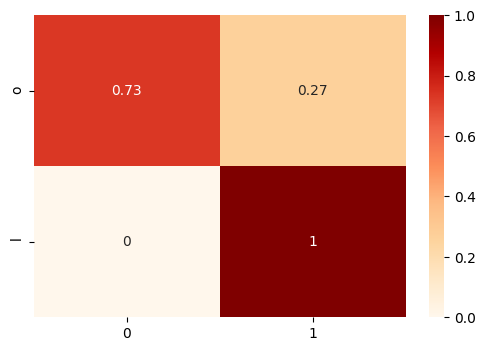

In [40]:
array = [[precision_o,error_o],[error_l,precision_l]]
df_cm = pd.DataFrame(array, index = [i for i in "ol"],
                  columns = [i for i in "01"])
sn.heatmap(df_cm, annot=True, cmap="OrRd")

Finalmente, graficándo esto en un plano, tenemos:

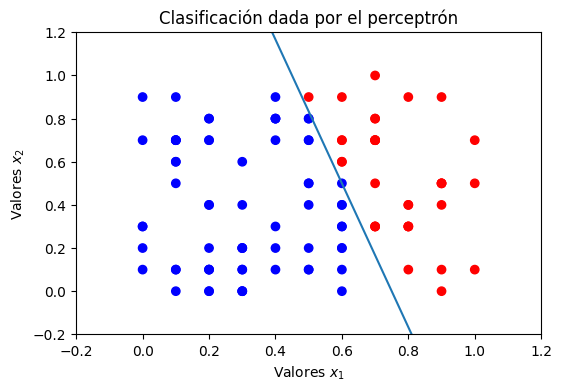

In [46]:
df_salida = pd.DataFrame(df_salida)
y = df_salida[1]

x1 = df_salida[2]
x2 = df_salida[3]
color = ['r' if value == 1 else 'b' for value in y]
label = [['l'],['o']]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('Valores $x_1$')
plt.ylabel('Valores $x_2$')
plt.title('Clasificación dada por el perceptrón')
a = -peso_w_1/peso_w_2
xx = np.linspace(-5, 5)
yy = a * xx - valor_b/peso_w_2
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.plot(xx,yy)
plt.show()

Donde para generar la línea divisora entre los dos tipos de valores clasificados, hubo que hacer el siguiente cálculo en base a los pesos $\text{w}$ y el valor $b$:

$$
y(x) = \frac{w_1 \cdot b \cdot x}{w_2^2} = \frac{-0.\bar{3}\cdot0.25\cdot x}{0.01}
$$



En base a estos resultados, queremos tener un perceptrón que se auto-corrija iterativamente. El objetivo es tener un algoritmo que encuentre los mismos pesos óptimos que identificamos en los pasos anteriores. Para ello, definiremos una nueva función con *hiperparámetros*. Un hiperparámetro es un parámetro usado para controlar el perceptrón, y que no ingresa en él. En este caso, entregaremos la razón de aprendizaje y la cantidad de iteraciones en las que el perceptrón se irá ajustando:

In [42]:
datos = np.copy(df)
datos = np.array(datos)

def perceptron_iterativo_datos(datos,aprendizaje,iteraciones):
    valores = datos[:,:-1]
    letras = datos[:,-1]
    m, n = valores.shape
    w = np.zeros(shape=(n+1,1),dtype=float)
    lista_errores = []
    
    for iteracion in range(iteraciones):
        numero_errores = 0
        
        for indice, x_i in enumerate(valores):
            #insertando 1 para hacer x_0 = 1 como en varios modelos
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            # llamamos la función de inicialización del principio del cuaderno
            y = theta(np.dot(x_i.T, w))
            # transformamos las letras a valores numéricos para comparar
            letras[indice] = 1.0 if (letras[indice] == 'l') else 0.0
            # en caso de haber diferencia entre el valor entregado por la función
            # de inicialización y el valor esperado, registramos el error
            if(np.squeeze(y) - letras[indice]) != 0:
                w += (aprendizaje*(letras[indice] - y*x_i)).astype(np.float64)
                numero_errores += 1
                
        lista_errores.append(numero_errores)
    return w, lista_errores

In [43]:
w, lista_errores = perceptron_iterativo_datos(datos,0.5,10)
print(w)
print(lista_errores)

[[-2.5]
 [ 0.9]
 [ 0.9]]
[24, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Arriba podemos ver los resultados entregados por el código, que nos entrega los pesos correspondientes a cada entrada (en este caso, también agregamos una columna $x_0 = 1$ y así pudimos encontrar un nuevo $b$). No son los mismos valores que en el método que usamos anteriormente, sin embargo, podemos ver a continuación cómo este nuevo método iterativo comienza en un valor por defecto que da bastantes errores, y con el paso de las iteraciones va acercándose más a cero errores en la clasificación de las letras ```l``` y ```o```, llegando a cero en la tercera iteración.

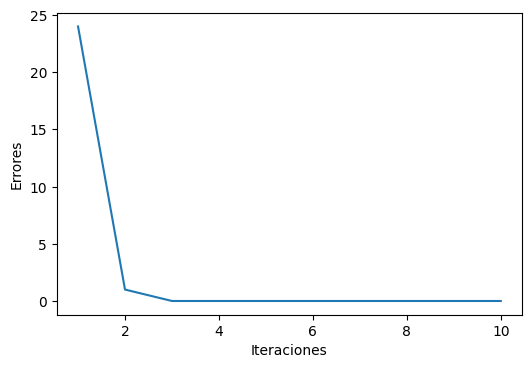

In [44]:
lista_iteraciones = np.arange(1, 11)
plt.plot(lista_iteraciones, lista_errores)
plt.xlabel('Iteraciones')
plt.ylabel('Errores')
plt.show()

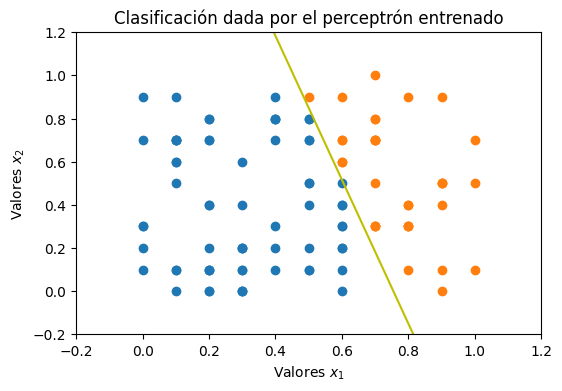

In [45]:
valores = datos[:,:-1]

x1 = np.linspace(-5, 5)
m = -w[1]*3.33333/(w[2])

c = -w[0]/(w[2])

x2 = m*x1 + c*0.906

plt.scatter(valores[:, 0][y==0], valores[:, 1][y==0])
plt.scatter(valores[:, 0][y==1], valores[:, 1][y==1])
plt.xlabel("Valores $x_1$")
plt.ylabel("Valores $x_2$")
plt.title('Clasificación dada por el perceptrón entrenado')

plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])

plt.plot(x1, x2, 'y-')
plt.show()

### 5. Análisis
>Analizar y concluír sobre los resultados obtenidos en los pasos 2, 3 y 4.

<!-- Respecto a la compuerta AND y OR, sabemos que el perceptrón devolverá $1$ para cualquier valor entrante mayor o igual que $0$, así que decidimos asignarle el valor $-1.9$ a $b$ para que el resultado de la suma $x_1w_1+x_2w_2+b$ sea $0.1$ solo cuando se cumpla simultáneamente que $x_1=1$ y $x_2=1$. Al analizarlo con el código dentro del $\text{for}$ en la misma celda donde definimos la función, pudimos comprobar que la compuerta funciona correctamente. -->

Al realizar cada uno de los pasos anteriores fuimos aprendiendo diferentes características de los perceptrones, y consideramos que tras realizar este laboratorio pudimos entender correctamente su funcionamiento y el porqué es importante que auto-ajuste sus hiperparámetros.

Esta importancia la demostramos al intentar encontrar los pesos $w$ utilizando iteraciones ```for``` en Python para cada uno de los posibles valores que varían dentro de la función de nuestro perceptrón, y luego irnos por el camino correcto de generar un perceptrón que vaya ajustando por sí mismo estos valores en la función  ```perceptron_iterativo_datos```, basándonos en información del sitio web *Towards Data Science*. Esta última función tiene muchísimas menos iteraciones para encontrar valores óptimos para una correcta clasificación en comparación con la cantidad de iteraciones que debimos ejecutar en un principio, siendo computacionalmente muy beneficiosa a pesar de llegar al mismo resultado. Eso sí, la función auto-ajustada nos generó una recta que no se condice adecuadamente con lo que realmente debería mostrar, ya que a pesar de obtener una clasificación adecuada tuvimos que realizar un pequeño ajuste para mostrar esa recta en el gráfico, multiplicando por 3.333 el $w_1$. No logramos identificar exactamente por qué ocurre esto, pero al menos identificamos qué pasaba y lo corregimos con el fin de una buena visualización de los resultados.

Un desafío que tuvimos fue interpretar correctamente el conjunto de datos ```letters.csv```, y tras explorar un poco los datos identificamos a qué correspondía cada columna. Esto lo pudimos manejar correctamente en el perceptrón y los resultados van acorde a esos datos.

Por otro lado, para las compuertas lógicas razonamos tal como si hubieramos realizado un circuito en la vida real, donde las entradas y las salidas son binarias y ninguna 'cuenta' más que otra, así que desde un principio tomamos la decisión de dar peso $1$ y un límite específico que debiera ser superado para devolver un $1$. Esto, basándonos en nuestro conocimiento previo adquirido en la asignatura *Arquitectura de Computadoras* de nuestra escuela. Decidimos identificar errores como una serie de entradas de posibles combinaciones porque se nos volvió más práctico de representar visualmente, y estamos muy satisfechos con las gráficas generadas pues conseguimos codificar funciones genéricas para encontrar perturbaciones en nuestro perceptrón que no deberían existir bajo las reglas que definimos.

Para finalizar, nos gustaría mucho implementar varias mejoras y lograr optimizar el código para el siguiente laboratorio en base a lo aprendido en esta experiencia, que sin duda fue muy positiva para complementar con la práctica lo visto en clases y en donde logramos probar nuestras propias teorías e investigar lo que es aceptado por la comunidad y la academia.